## Load Data

In [1]:
import numpy as np
from scipy import linalg
import pickle

subject = "962058"

# load previously fitted DTIs
#tensor_file_hr = np.load("preprocessed_data/" + subject + "tensors_hr.npz")

# load reconstructed DTI
with open('reconstructed_tensors.pickle', 'rb') as handle:
        reconstruction = pickle.load(handle)

# get evals
#evals_hr = tensor_file_hr['evals_hr']
#print(evals_hr.shape)

# get evecs
#evecs_hr = tensor_file_hr['evecs_hr']
#print(evecs_hr.shape)

In [2]:
evals_rec, evecs_rec = linalg.eig(reconstruction[:, :, :])
print(evals_rec.shape)
print(evecs_rec.shape)

(144, 174, 144, 3)
(144, 174, 144, 3, 3)


In [3]:
from dipy.reconst.dti import fractional_anisotropy, color_fa

# hr
"""
FA_hr = fractional_anisotropy(evals_hr)
FA_hr[np.isnan(FA_hr)] = 0

FA_hr = np.clip(FA_hr, 0, 1)
RGB_hr = color_fa(FA_hr, evecs_hr)
"""


# reconstructed hr
FA_rec = fractional_anisotropy(evals_rec)
FA_rec[np.isnan(FA_rec)] = 0

FA_rec = np.clip(FA_rec, 0, 1)
RGB_rec = color_fa(FA_rec, evecs_rec)

## Visualisation by ellipsoids

In [4]:
from IPython.display import Image
from dipy.data import get_sphere

sphere = get_sphere('repulsion724')

from dipy.viz import window, actor

# Enables/disables interactive visualization
interactive = False

scene = window.Scene()

In [13]:
cfa_hr = RGB_hr
cfa_hr /= cfa_hr.max()

scene.add(actor.tensor_slicer(evals_hr, evecs_hr, scalar_colors=cfa_hr, sphere=sphere,
                              scale=0.3))

window.record(scene, n_frames=1, out_path='tensor_ellipsoids_hr.png',
              size=(1200, 1200))
if interactive:
    window.show(scene)

MemoryError: 

In [6]:
scene.clear()

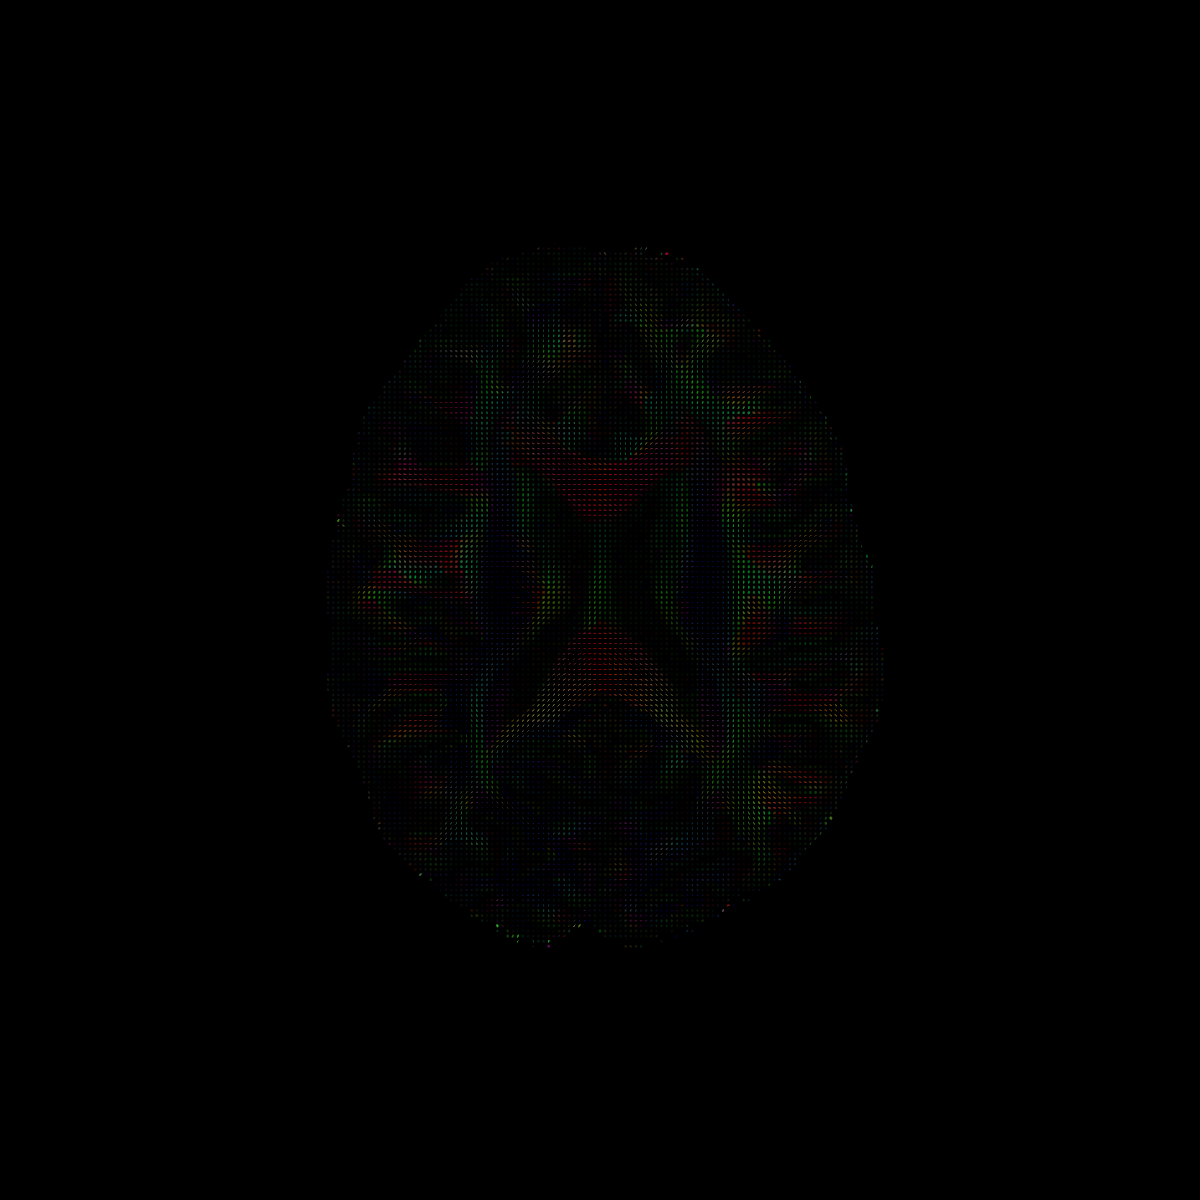

In [7]:
Image('tensor_ellipsoids_hr.png')

In [5]:
# lr
cfa_rec = RGB_rec
cfa_rec /= cfa_rec.max()

scene.add(actor.tensor_slicer(evals_rec, evecs_rec, scalar_colors=cfa_rec, sphere=sphere,
                              scale=0.3))

window.record(scene, n_frames=1, out_path='tensor_ellipsoids_rec.png',
              size=(1200, 1200))
if interactive:
    window.show(scene)

In [6]:
scene.clear()

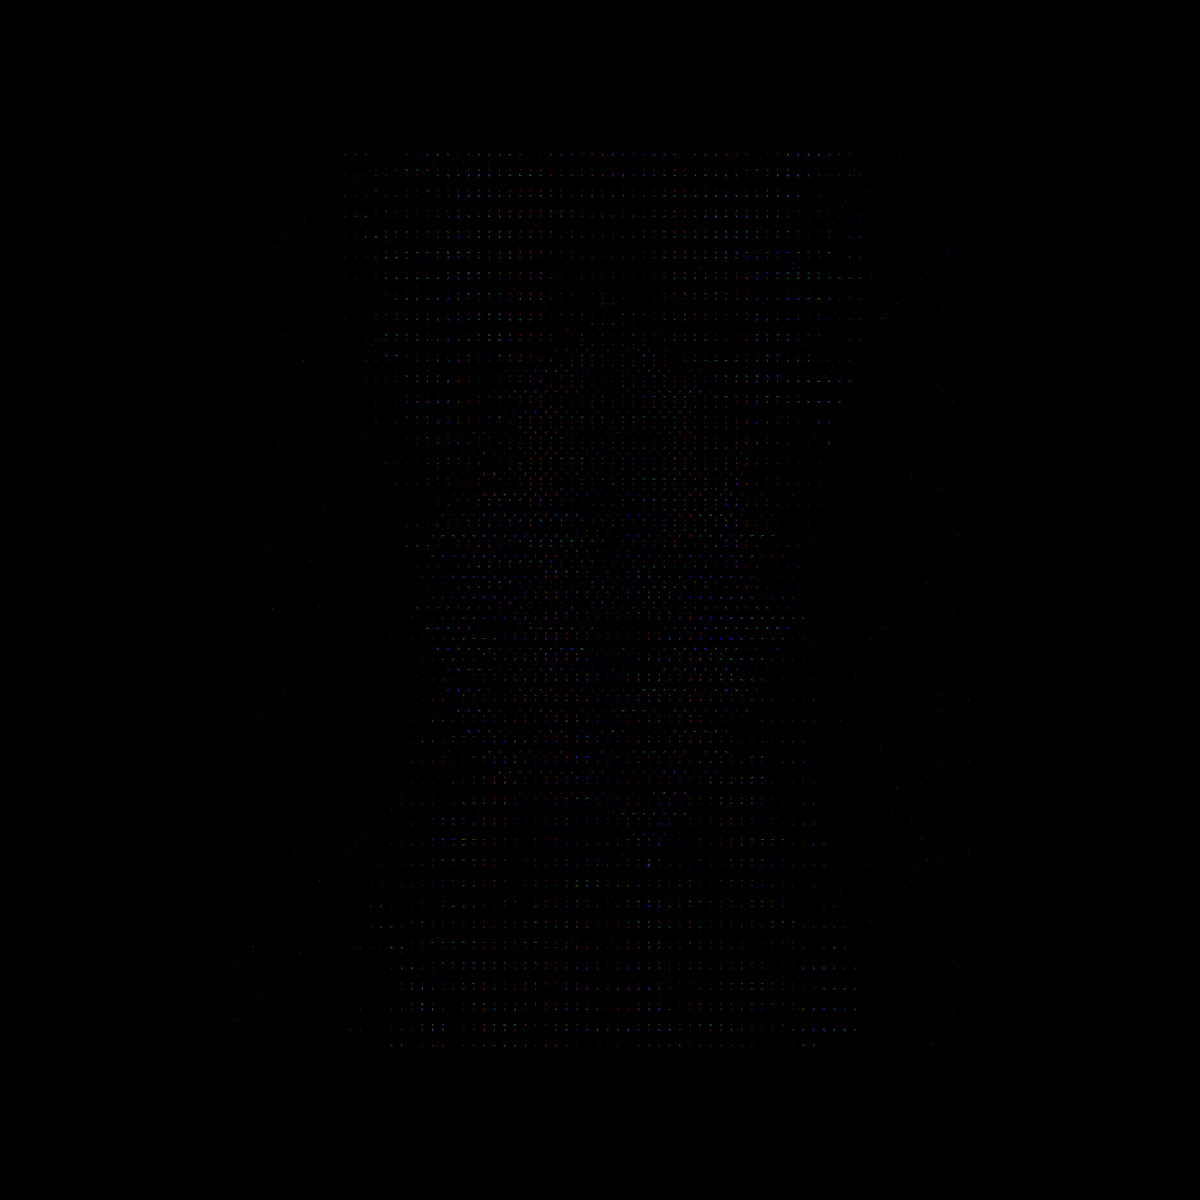

In [7]:
Image('tensor_ellipsoids_rec.png')